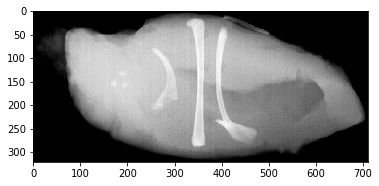

In [100]:
import cv2
import numpy as np
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import scipy.misc
from skimage import data
from skimage import filters
from skimage import exposure
import numpy.ma as ma


img = cv2.imread('C:/Users/user/Documents/DIP/DIP3E_Original_Images_CH09/Fig0918(a)(Chickenfilet with bones).tif',0)
plt.imshow(img)
plt.gray()
plt.show()

In [101]:
val = filters.threshold_otsu(img)
val

79

### 二值化影像

(321L, 712L)

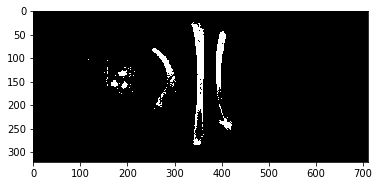

In [102]:
mask = img < 200
mask_im = img.copy()
mask_im[mask] = 0
mask_im[~mask] = 1
plt.imshow(mask_im)
mask_im.shape

### 侵蝕圖片

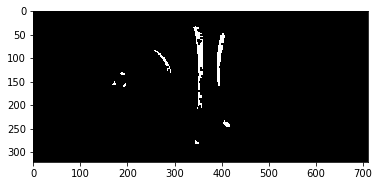

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [103]:
kernel = np.ones((5,5))
erosion = cv2.erode(mask_im,kernel)

plt.imshow(erosion)
plt.show()
erosion.shape
erosion[erosion>0]

### 全自動化連通成分抽取

In [104]:
none_zero = ma.array(erosion)
none_zero_row,none_zero_col = (X>0).nonzero()
erosion[none_zero_row[0]][none_zero_col[0]]
kernel_dia = np.ones((3,3),dtype=np.uint8)

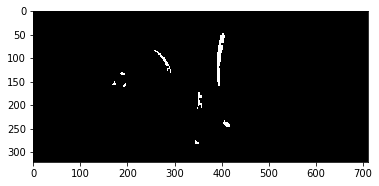

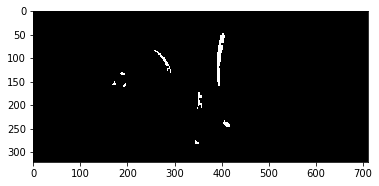

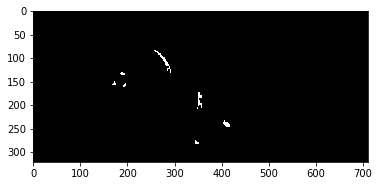

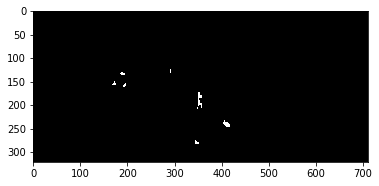

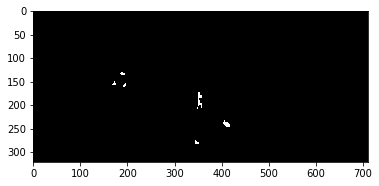

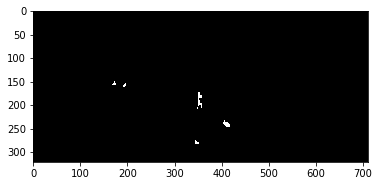

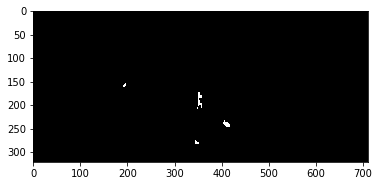

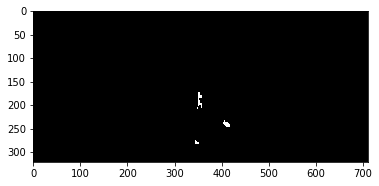

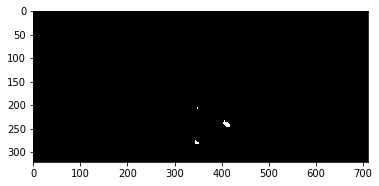

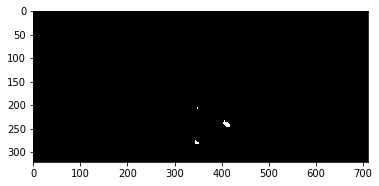

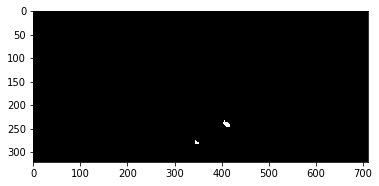

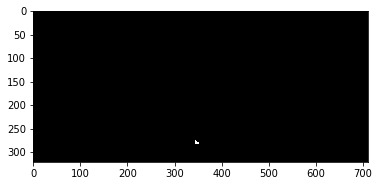

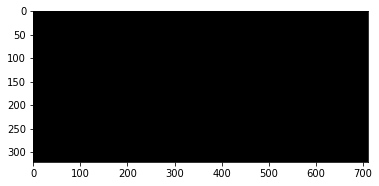

('i:', array([], dtype=int64))


In [107]:
def connected_component_iter(X_k_1,B,A):
    a = cv2.dilate(X_k_1,B)
    b = np.logical_and(a,A)
    return b.astype(np.uint8)
def connected_component_findOne(X,B,A):  
    while True:
        X_new = connected_component_iter(X,kernel_dia,erosion)
        if np.array_equal(X,X_new):
            return X
        else:
            X = X_new
# 尋找初始點X0
def connected_component_findAll(kernel,A):
    i = 0;
    A_new = A.copy()
    Component_image = np.zeros(A.shape)
    while True:
        X = np.zeros(A.shape,dtype=np.uint8)
        none_zero = ma.array(A_new)
        none_zero_row,none_zero_col = (none_zero>0).nonzero()
        if(none_zero_row.size==0):
            print('i:',none_zero_row)
            return Component_image
            break
        X[none_zero_row[0]][none_zero_col[0]] = 1
        cim = connected_component_findOne(X,kernel_dia,A_new)
        A_new -=cim
        i+=1
        Component_image+=(cim*i)
        plt.imshow(A_new)
        plt.show()

Connect_Component = connected_component_findAll(kernel_dia,erosion)

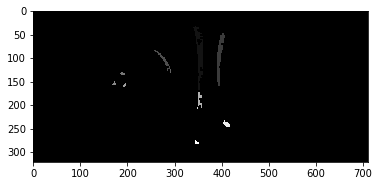

In [110]:
plt.imshow(Connect_Component)
plt.show()